In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [24]:
t = np.linspace(0, 1, 100)

In [25]:
def dsdx(x, s):
    y1, y2 = s
    return[y1 + y2**2 + 3*x,
            3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
s_0 = (y1_0, y2_0)

In [26]:
x = np.linspace(0, 1, 100)
sol = odeint(dsdx, y0=s_0, t = x, tfirst= True)

In [27]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

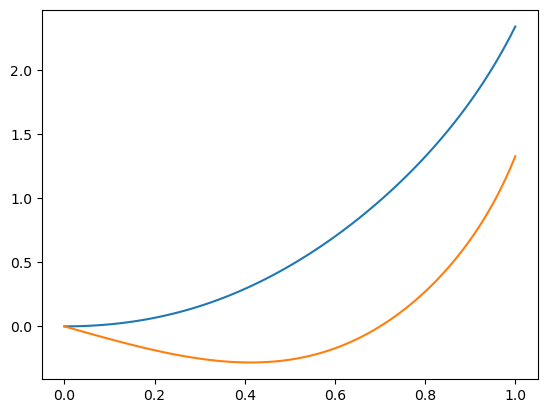

In [28]:
plt.plot(t, y1_sol)
plt.plot(t, y2_sol)

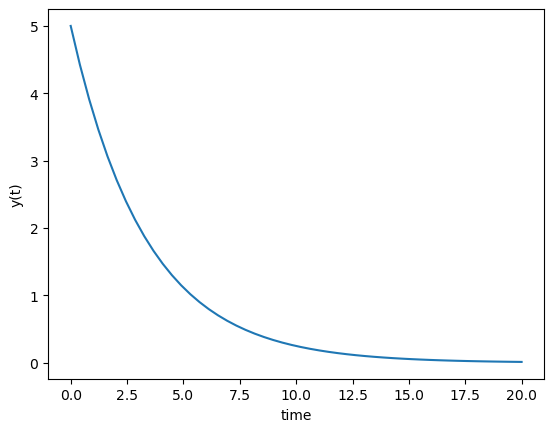

In [29]:
# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()